# SARIMAX

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model.
ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model. Therefore, we can say SARIMAX is a seasonal equivalent model like SARIMA and Auto ARIMA.

Another seasonal equivalent model holds the seasonal pattern; it can also deal with external effects. 
This feature of the model differs from other models. For example, in a time series, the temperature has seasonal effects like it is low in winter, high in summers. Still, with the effect of external factors like humidity, the temperature in winter is increased and also due to rain, there is a chance of lower temperature. We can’t predict the exact value for these factors if they do not appear in a cyclic or any seasonal behaviour.
Other models are not capable of dealing with this kind of data.

In the SARIMAX models parameter, we need to provide two kinds of orders.
The first one is similar to the ARIMAX model (p, d, q), 
and the other is to specify the effect of the seasonality; 
we call this order a seasonal order in which we are required to provide four numbers. 

(Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv(r'C:/Users/User/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv')

In [6]:
df.columns

Index(['year', 'month', 'decimal_date', 'average', 'interpolated'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 28.6 KB


In [8]:
df.isnull().sum()

year            0
month           0
decimal_date    0
average         7
interpolated    0
dtype: int64

In [9]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'],'day':1})

In [10]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [11]:
df = df.set_index('date')

In [12]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [13]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<AxesSubplot:xlabel='date'>

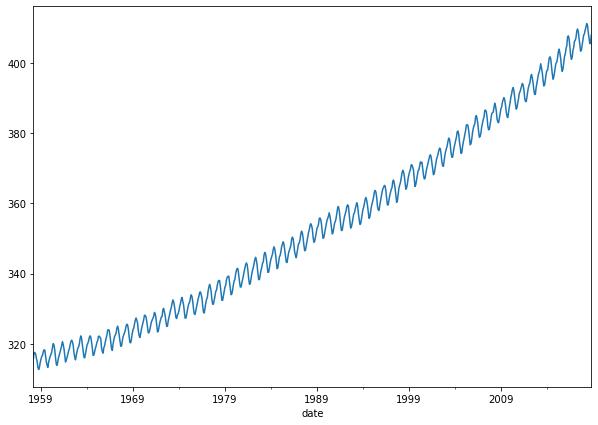

In [14]:
df['interpolated'].plot(figsize=(10,7))

In [15]:
result = seasonal_decompose(df['interpolated'], model='add')

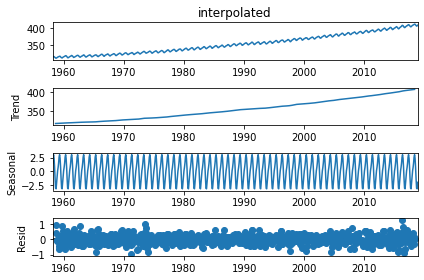

In [16]:
result.plot();

<AxesSubplot:xlabel='date'>

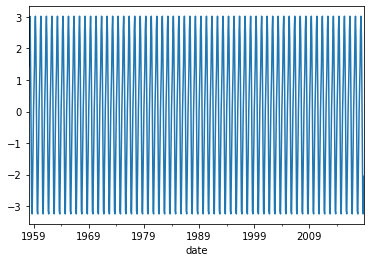

In [17]:
result.seasonal.plot()

In [18]:
#How to checck whether seasonal or not

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dftest = adfuller(df.interpolated, autolag = 'AIC')

In [21]:
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  4.994847244403932
2. P-Value :  1.0
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 708
5. Critical Values :
	 1% :  -3.439620010600208
	 5% :  -2.8656309041017756
	 10% :  -2.5689484851894413


from above we can find that the series is not Stationary(seasonal). We can make it to stationary with differencing methods and Rolling mean method


In [22]:
rolling_mean = df.rolling(window = 12).mean()
rolling_mean

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,NaN,NaN,NaN,NaN,NaN
1958-04-01,NaN,NaN,NaN,NaN,NaN
1958-05-01,NaN,NaN,NaN,NaN,NaN
1958-06-01,NaN,NaN,NaN,NaN,NaN
1958-07-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-07-01,2017.583333,6.5,2018.083333,407.560833,407.560833
2018-08-01,2017.666667,6.5,2018.166667,407.715833,407.715833
2018-09-01,2017.750000,6.5,2018.250000,407.894167,407.894167


In [23]:
from statsmodels.tsa.statespace.tools import diff
df['diff_1'] = diff(df['interpolated'], k_diff=1)

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
def adf_test(dataset):
    result = adfuller(dataset.dropna(), autolag ='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    if result[1]<0.05:
        print(out['p-value'])
        print("data is stationary")
        print("reject Null Hypothesis")
        print("It has no unit root")
    else:
        print(out['p-value'])
        print("data is stationary")
        print("rejetc Null Hypothesis")
        print("It has no unit root")

In [26]:
adf_test(df['diff_1'])

ADF test statistic       -5.200976
p-value                   0.000009
# lags used              20.000000
# observations          707.000000
critical value (1%)      -3.439633
critical value (5%)      -2.865637
critical value (10%)     -2.568952
8.75184480819648e-06
data is stationary
reject Null Hypothesis
It has no unit root


In [27]:
#Now the p-values is less than 0.05

# Here we can go with the methods...Stationary series

# case-2
when the series is SEASONAL and seasonal=True

In the SARIMAX models parameter, we need to provide two kinds of orders. The first one is similar to the ARIMAX model (p, d, q), and the other is to specify the effect of the seasonality; we call this order a seasonal
order in which we are required to provide four numbers. 

p is not less than 0.05 ...could not reject Null hypothesis. it is Seasonal.

In [28]:
# So this is Seasonal and then find value of(p,q)
from pmdarima import auto_arima
auto_arima(df['interpolated'],seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Thu, 27 Jan 2022   AIC                            423.401
Time:                                      14:36:27   BIC                            450.943
Sample:                                           0   HQIC                           434.028
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3560      0.035    -10.073      0.000      -0.425      -0.287
ma.L2         -0.0224      0.028     -0.792      0.428      -0.078       0.033
ma.L3         -0.0861      0.028     -3.042      0.002      -0.142      -0.031
ar.S.L12       0.9996      0.000   2870.137      0.000       0.999       1.000
ma.S.L12      -0.8653      0.021    -40.475      0.000      -0.907      -0.823
sigma2         0.0956      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Go for train and test splits

In [38]:
train = df.iloc[:717] 
test = df.iloc[717:]

In [39]:
model_sarimax = SARIMAX(train['interpolated'], order=(0,1,3),seasonal_order=(1,0,1,12))

In [41]:
result = model_sarimax.fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.189
Date:                              Thu, 27 Jan 2022   AIC                            414.378
Time:                                      15:07:50   BIC                            441.820
Sample:                                  03-01-1958   HQIC                           424.975
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3536      0.036     -9.920      0.000      -0.423      -0.284
ma.L2         -0.0240      0.037     -0.649      0.516      -0.096       0.048
ma.L3         -0.0876      0.030     -2.965      0.003      -0.146      -0.030
ar.S.L12       0.9996      0.000   3076.618      0.000       0.999       1.000
ma.S.L12      -0.8669      0.022    -38.555      0.000      -0.911      -0.823
sigma2         0.0950      0.005     20.287      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#From above we can check that p-value>0.05 so it is Seasonal series.

In [44]:
start = len(train)
end = len(train)+len(test)-1

In [45]:
predictions = result.predict(start,end,typ='levels').rename('SARIMA Prediction')

In [46]:
predictions

2017-12-01    406.609703
2018-01-01    407.824572
2018-02-01    408.578577
2018-03-01    409.483498
2018-04-01    411.038772
2018-05-01    411.641645
2018-06-01    410.862541
2018-07-01    409.173199
2018-08-01    407.072991
2018-09-01    405.622605
2018-10-01    405.892276
2018-11-01    407.425204
Freq: MS, Name: SARIMA Prediction, dtype: float64

<AxesSubplot:xlabel='date'>

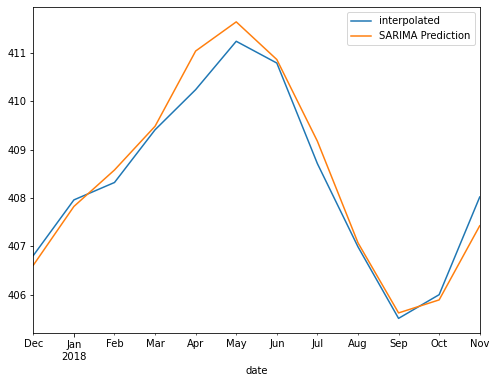

In [47]:
test['interpolated'].plot(legend=True, figsize=(8,6))
predictions.plot(legend=True)

In [48]:
from statsmodels.tools.eval_measures import rmse

In [49]:
error = rmse(test['interpolated'],predictions)

In [50]:
error

0.3576366587203376

In [51]:
test['interpolated'].mean()

408.3333333333333

# Forecast into the unknown value

In [53]:
model = SARIMAX(df['interpolated'], order=(0,1,3),seasonal_order=(1,0,1,12) )

In [54]:
results = model.fit()

In [56]:
fcast = results.predict(len(df) ,len(df)+11,typ='levels').rename('SARIMA FORECAST')

In [65]:
fcast

2018-12-01    409.255203
2019-01-01    410.416321
2019-02-01    411.058184
2019-03-01    411.987686
2019-04-01    413.447184
2019-05-01    414.103469
2019-06-01    413.367621
2019-07-01    411.625470
2019-08-01    409.577278
2019-09-01    408.123935
2019-10-01    408.424311
2019-11-01    410.023027
Freq: MS, Name: SARIMA FORECAST, dtype: float64

# Now check Original and forecast value

<AxesSubplot:xlabel='date'>

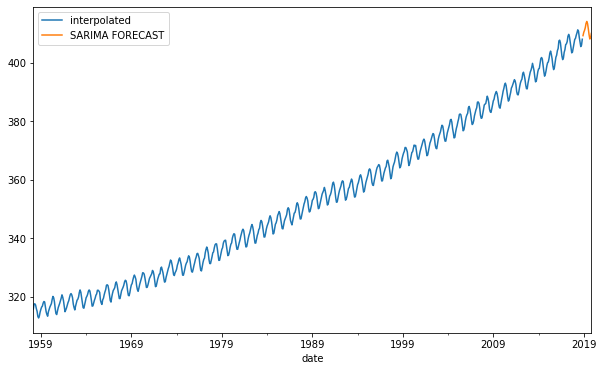

In [64]:
df['interpolated'].plot(legend=True, figsize=(10,6))
fcast.plot(legend=True)

# case-3 Can we use ACF and PACF plot to find order of (p,q)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

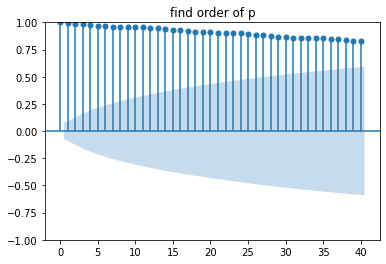

In [31]:
plot_acf(df['interpolated'],title='find order of p',lags=40);
#p=0

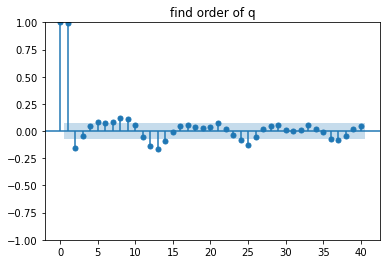

In [32]:
plot_pacf(df['interpolated'],title='find order of q',lags=40);
#q=0

In [36]:
stepwise_fit = auto_arima(df['interpolated'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1785.006, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2369.532, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1880.794, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1935.623, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2375.248, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1440.128, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1684.115, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1441.136, Time=1.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1440.918, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1715.503, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1608.681, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1442.523, Time=1.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1532.865, Time=0.21 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.112 seconds


In [37]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  729
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -715.064
Date:                Thu, 27 Jan 2022   AIC                           1440.128
Time:                        14:53:59   BIC                           1463.079
Sample:                             0   HQIC                          1448.984
                                - 729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0395      0.003     11.810      0.000       0.033       0.046
ar.L1          1.5468      0.022     70.815      0.000       1.504       1.590
ar.L2         -0.8502      0.023    -36.917      0.000      -0.895      -0.805
ma.L1         -0.9012      0.018    -49.926      0.000      -0.937      -0.866
sigma2         0.4158      0.021     19.426      0.000       0.374       0.458
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                34.52
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.48
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""